In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pydub python_speech_features

# Importing Packages

In [1]:
!pip install numpy==1.21

  Using cached numpy-1.21.0-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\we\\anaconda3\\Lib\\site-packages\\~=mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [1]:
import os
import pydub
from pydub import AudioSegment
from pydub.silence import split_on_silence
from python_speech_features import mfcc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\Users\we\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Data Preprocessing

In [2]:
# Set directory path
directory = 'audio/'

# Get list of all folders in directory
class_labels = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]

# Print list of folders
print(class_labels)


['Car_honk', 'Dog_bark', 'Siren']


In [9]:
# Set parameters
n_mfcc = 20

# Initialize lists for audio data and labels
X = []
y = []

# Loop through each class directory
for i, label in enumerate(class_labels):
    class_dir = f'audio/{label}/'
    
    # Loop through each audio file in the class directory
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        
        try:
            # Load audio file
            audio = AudioSegment.from_file(file_path)
            audio_data = np.array(audio.get_array_of_samples())
            sample_rate = audio.frame_rate
        
            # Split audio into chunks of silence
            audio_chunks = split_on_silence(audio, min_silence_len=500, silence_thresh=-50)
            
            # Extract MFCCs from each chunk of audio
            nfft = 2400 # Set larger FFT size
            for chunk in audio_chunks:
                chunk_data = np.array(chunk.get_array_of_samples())
                mfccs = mfcc(chunk_data, samplerate=sample_rate, numcep=n_mfcc, nfft=nfft) # Set larger nfft value
                mfccs = np.mean(mfccs, axis=0)
  
                # Append MFCCs and label to lists
                X.append(mfccs)
                y.append(i)
                
        except Exception as e:
            pass


In [10]:
X

[array([ 35.97618386, -15.64720536,   2.39344198,  -2.05391916,
         -2.99440915,   1.68650006,  -2.60390285,   3.62515515,
          4.7141682 ,   2.97895998,   2.60587904,  -6.08942404,
          3.11282059,   2.67565735,   1.93586867,  -1.90563234,
         -2.43323812,  -1.95208582,  -0.67050229,  -0.38656972]),
 array([ 15.66439978,  12.62492093, -28.62231814, -19.34000885,
        -13.58284421, -22.02575127,  12.19580714, -13.24040814,
         -1.02699224,   0.42105155,   4.06335948,  -4.93331263,
         -8.91578477,  -5.43851978,   0.55852623,  -1.99911943,
         -0.09525779,   5.69094688,   5.54641697,   2.05374347]),
 array([ 17.25594977,  21.68286424, -33.754526  , -15.51967069,
        -21.10897109, -31.98518597,  10.07203803, -11.75089747,
         -6.9351809 ,  -3.0038076 ,   3.81094429,  -6.98009962,
        -11.67778536,  -3.16216785,   5.90983206,  -4.91228692,
         -3.66833816,   5.13878799,   3.98412148,   2.90276683]),
 array([ 15.24557323,  15.89823997

In [11]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [12]:
# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

onehot_encoder = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(y.reshape(len(y), 1))

In [13]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [14]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.shape

(474, 20)

# Model Training and Testing

In [44]:
# Define the model architecture
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               5376      
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                

In [45]:
# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 2s 21ms/step - loss: 3.5943 - accuracy: 0.4968 - val_loss: 1.0843 - val_accuracy: 0.7148
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 2.1045 - accuracy: 0.5825 - val_loss: 0.6936 - val_accuracy: 0.7852
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 1.5062 - accuracy: 0.6429 - val_loss: 0.5981 - val_accuracy: 0.7815
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 1.2373 - accuracy: 0.6460 - val_loss: 0.5359 - val_accuracy: 0.8037
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 1.2119 - accuracy: 0.6571 - val_loss: 0.5613 - val_accuracy: 0.8000
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 1.0644 - accuracy: 0.6603 - val_loss: 0.5701 - val_accuracy: 0.7926
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.9109 - accuracy: 0.6984 - val_loss: 0.5590 - val_accuracy: 0.8185
Epoch 8/

<Axes: >

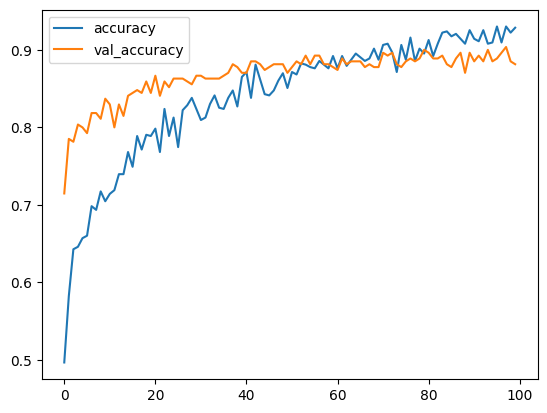

In [46]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

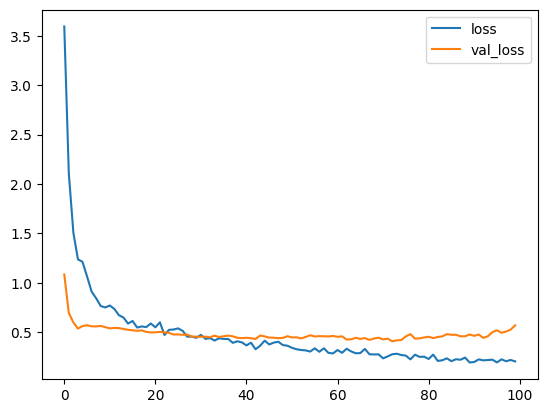

In [47]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

In [48]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.8815
Test accuracy: 0.8814814686775208


In [49]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert predictions to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=['Siren', 'Dog_bark', 'Car_honk']))


9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       Siren       0.80      0.67      0.73        42
    Dog_bark       0.91      0.96      0.93       171
    Car_honk       0.84      0.81      0.82        57

    accuracy                           0.88       270
   macro avg       0.85      0.81      0.83       270
weighted avg       0.88      0.88      0.88       270



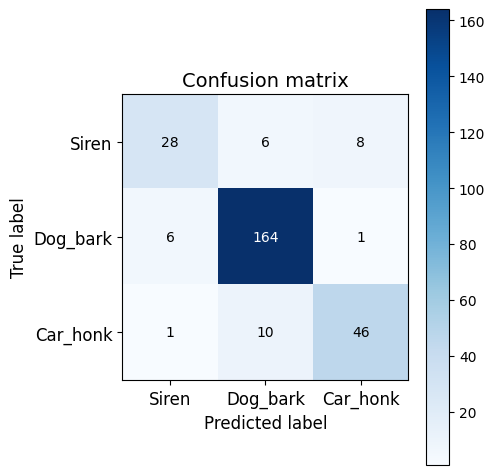

In [50]:
class_labels = ['Siren', 'Dog_bark', 'Car_honk']
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(conf_matrix, cmap="Blues")

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels to the x-axis and y-axis
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, fontsize=12)
ax.set_yticklabels(class_labels, fontsize=12)

# Add annotations
thresh = conf_matrix.max() / 2.0
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        ax.text(j, i, format(conf_matrix[i, j], "d"),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > thresh else "black")

# Add title and axis labels
ax.set_title("Confusion matrix", fontsize=14)
ax.set_xlabel("Predicted label", fontsize=12)
ax.set_ylabel("True label", fontsize=12)

plt.tight_layout()
plt.show()

9/9 [==============================] - 0s 2ms/step


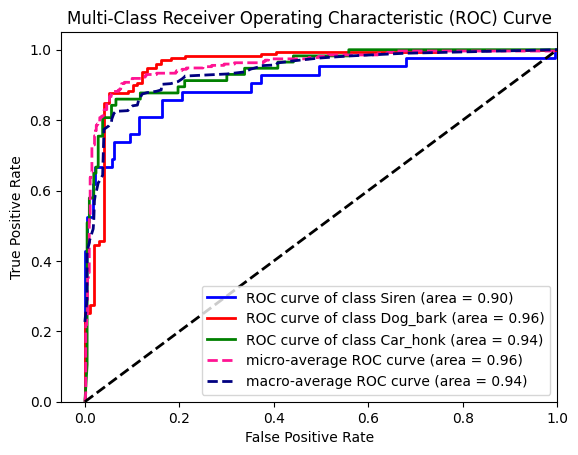

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

classes = class_labels

# Compute the predicted class probabilities for each sample
y_pred_prob = model.predict(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and AUC
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(len(classes)):
    tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= len(classes)
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', lw=2, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc_micro))

# Plot the macro-average ROC curve
plt.plot(fpr_macro, tpr_macro, color='navy', lw=2, linestyle='--',
         label='macro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc_macro))

# Add labels and legend
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [52]:
model.save('model.h5')

# Prediction Function

In [53]:
def predict_class(audio_path):
    n_mfcc = 20
    
    # Load audio file
    audio = AudioSegment.from_file(audio_path)
    audio_data = np.array(audio.get_array_of_samples())
    sample_rate = audio.frame_rate

    # Split audio into chunks of silence
    audio_chunks = split_on_silence(audio, min_silence_len=500, silence_thresh=-50)

    # Extract MFCCs from each chunk of audio
    mfccs_list = []
    nfft = 2048 # Set larger FFT size
    for chunk in audio_chunks:
        chunk_data = np.array(chunk.get_array_of_samples())
        mfccs = mfcc(chunk_data, samplerate=sample_rate, numcep=n_mfcc, nfft=nfft) # Set larger nfft value
        mfccs = np.mean(mfccs, axis=0)
        mfccs_list.append(mfccs)

    # Convert MFCCs to a numpy array
    mfccs_array = np.array(mfccs_list)

    # Reshape MFCCs to have 1 channel
    mfccs_array = mfccs_array.reshape(mfccs_array.shape[0], mfccs_array.shape[1], 1)

    # Load trained model
    model = load_model('model.h5')

    # Get predicted probabilities for each class
    probs = model.predict(mfccs_array)

    # Convert probabilities to predicted class labels
    predicted_classes = np.argmax(probs, axis=1)

    # Convert predicted class labels to class names
    class_names = ['Siren', 'Dog_bark', 'Car_honk']
    predicted_class_names = [class_names[i] for i in predicted_classes]

    return predicted_class_names

In [54]:
predict_class('/content/drive/MyDrive/audio/Car_honk/235506__ceberation__car-horn.wav')

1/1 [==============================] - 0s 51ms/step


['Car_honk']

In [55]:
predict_class('/content/drive/MyDrive/audio/Dog_bark/100032__nfrae__rose_bark.wav')

1/1 [==============================] - 0s 57ms/step


['Dog_bark']

In [56]:
predict_class('/content/drive/MyDrive/audio/Siren/108192__paubg_pou__ambulancia.wav')

1/1 [==============================] - 0s 56ms/step


['Siren']

In [14]:
!pip install sounddevice

In [1]:
!pip install numpy==1.21.0

  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\we\\anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [1]:
!pip install librosa[accelerated]

In [ ]:
import librosa
import numpy as np
import tensorflow as tf
import sounddevice as sd

# Load the pre-trained model
model = tf.keras.models.load_model('model.h5')

# Define the preprocessing function
def preprocess_audio(audio_data, sr):
    # Resample the audio data to the expected sample rate
    audio_data = librosa.resample(audio_data, sr, 16000, res_type='kaiser_best')
    # Compute the Mel spectrogram features
    mel_spec = librosa.feature.melspectrogram(audio_data, sr=16000, n_mels=128)
    # Convert the Mel spectrogram to decibels
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    # Standardize the feature matrix
    standardized_spec = (log_mel_spec - np.mean(log_mel_spec)) / np.std(log_mel_spec)
    # Expand the dimensions of the feature matrix to match the model input shape
    expanded_spec = np.expand_dims(standardized_spec, axis=-1)
    return expanded_spec

# Define the prediction function
def predict_class(audio_data, sr):
    preprocessed_data = preprocess_audio(audio_data, sr)
    prediction = model.predict(preprocessed_data)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class

# Define the audio callback function
def audio_callback(indata, frames, time, status):
    if status:
        print(status)
    audio_data = indata[:, 0]  # use only the first channel
    predicted_class = predict_class(audio_data, sr=44100)
    # do something with the predicted class, e.g. print it
    print(predicted_class)

# Start the audio stream
with sd.InputStream(channels=1, callback=audio_callback):
    while True:
        pass
